In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
%matplotlib inline

import skimage.data as sd
import skimage.color as color
import skimage.transform as st
from skimage.io import imread

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from mpl_toolkits.mplot3d import Axes3D

In [67]:
image_filename = "../images/San Francisco demo.png"

In [68]:
rgb = np.array(imread(image_filename)[...,:3], dtype=np.float64) / 255
rgb.min(), rgb.max()

rgb = st.rescale(rgb, 0.1)

In [69]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(rgb.shape)
assert d == 3
rgb_data = np.reshape(rgb, (w * h, d))

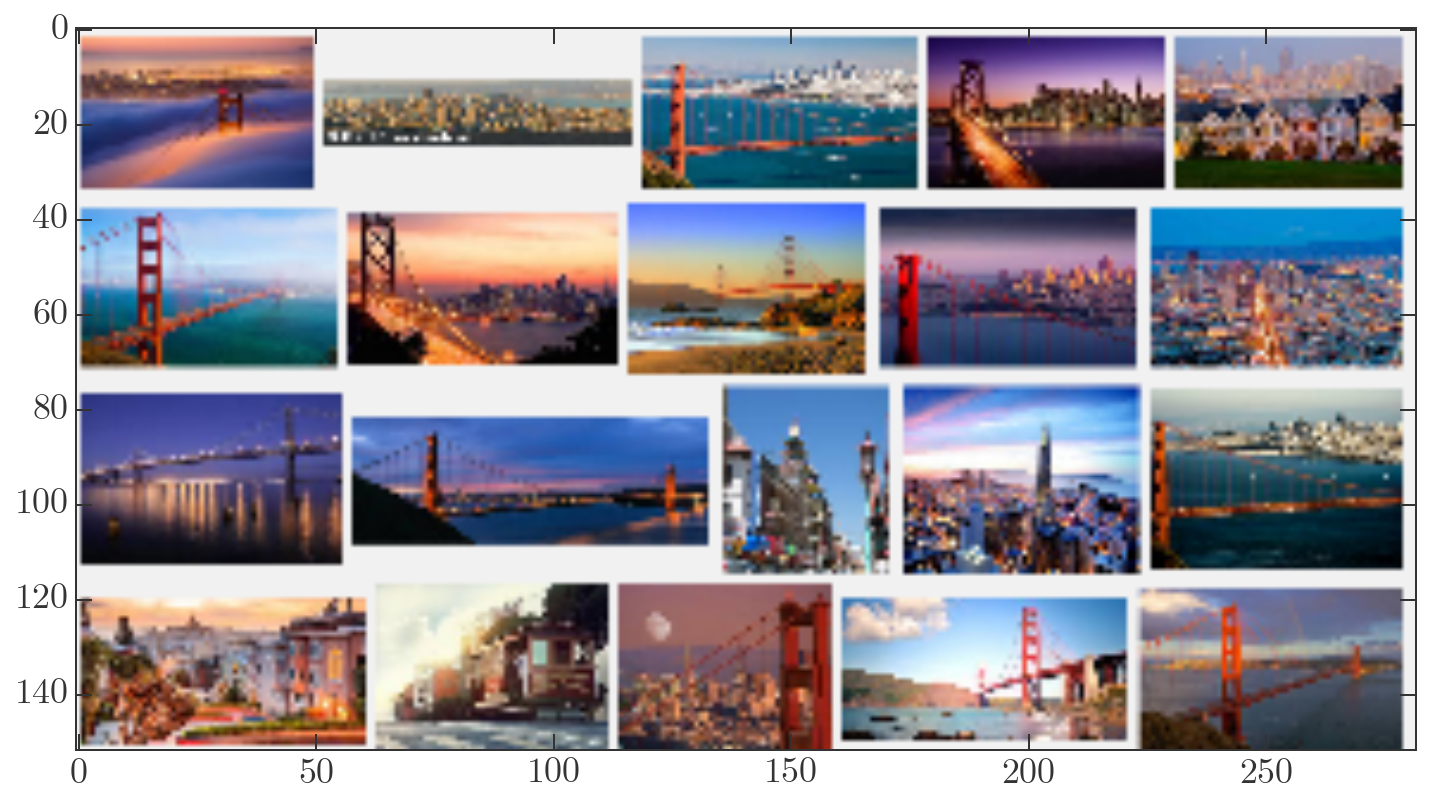

In [70]:
plt.figure(figsize=(12,10))
plt.imshow(rgb)

In [71]:
hsv_data = color.rgb2hsv(rgb)
hsv = hsv_data.reshape(-1, 3).T

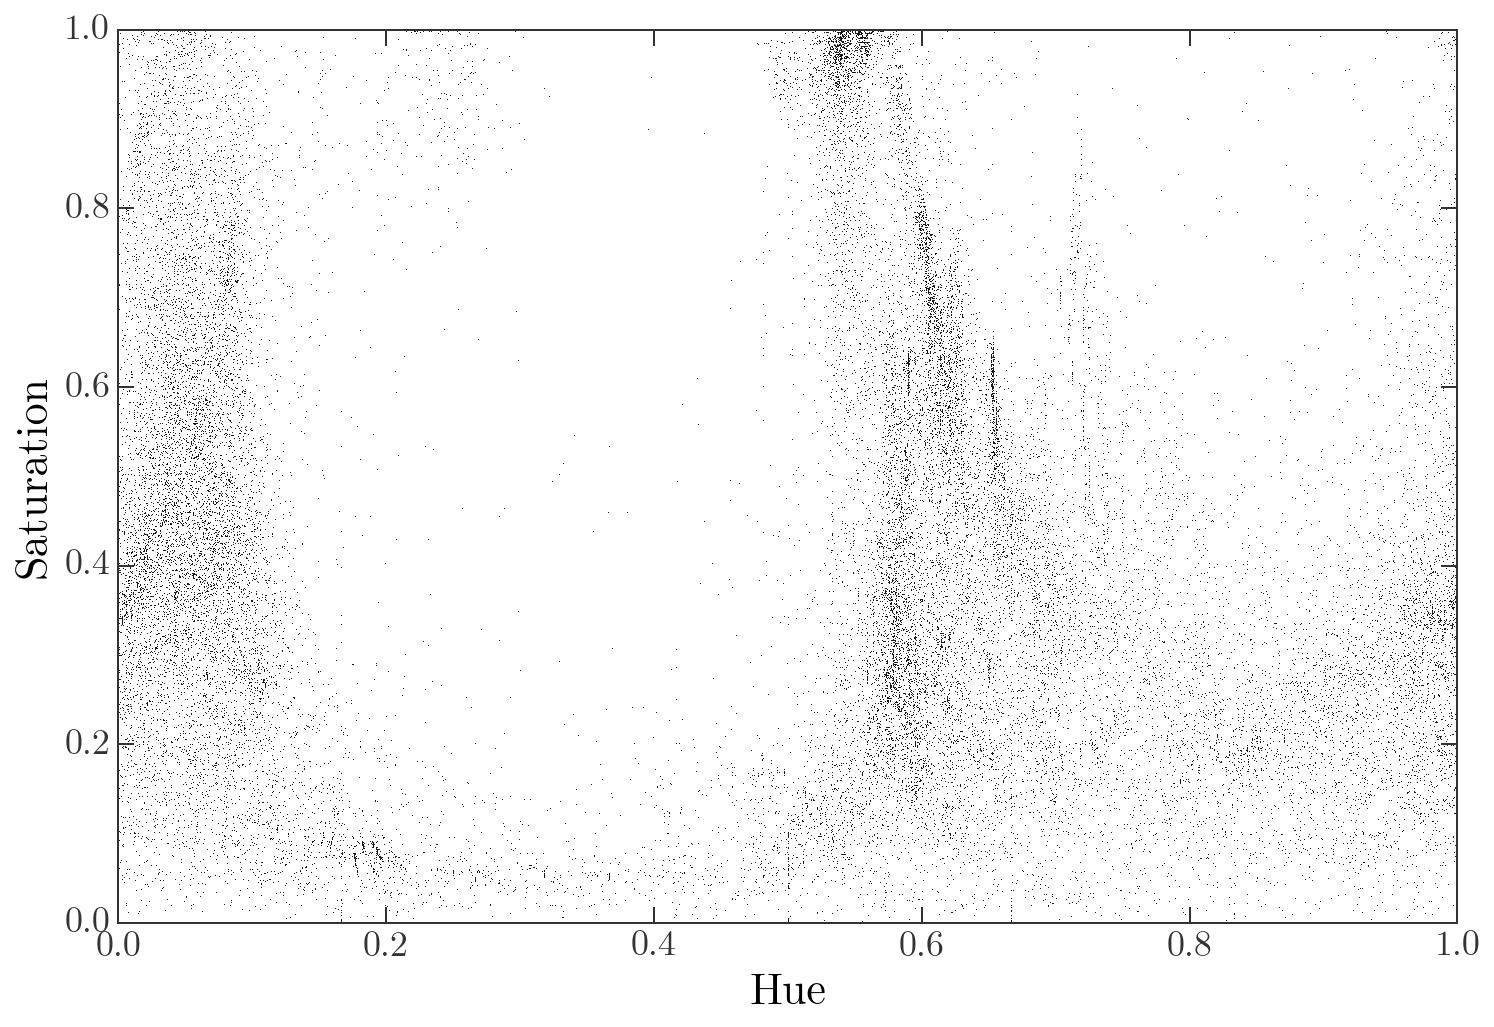

In [72]:
plt.figure(figsize=(12,8))
plt.plot(hsv[0], hsv[1], linestyle='none', alpha=1., marker=',');

plt.xlabel('Hue')
plt.ylabel('Saturation')

In [90]:
phi = 2*np.pi*hsv[0]
x = hsv[1]*np.cos(phi)
y = hsv[1]*np.sin(phi)
z = hsv[2]

# x = rgb_data[...,0].ravel()
# y = rgb_data[...,1].ravel()
# z = rgb_data[...,2].ravel()

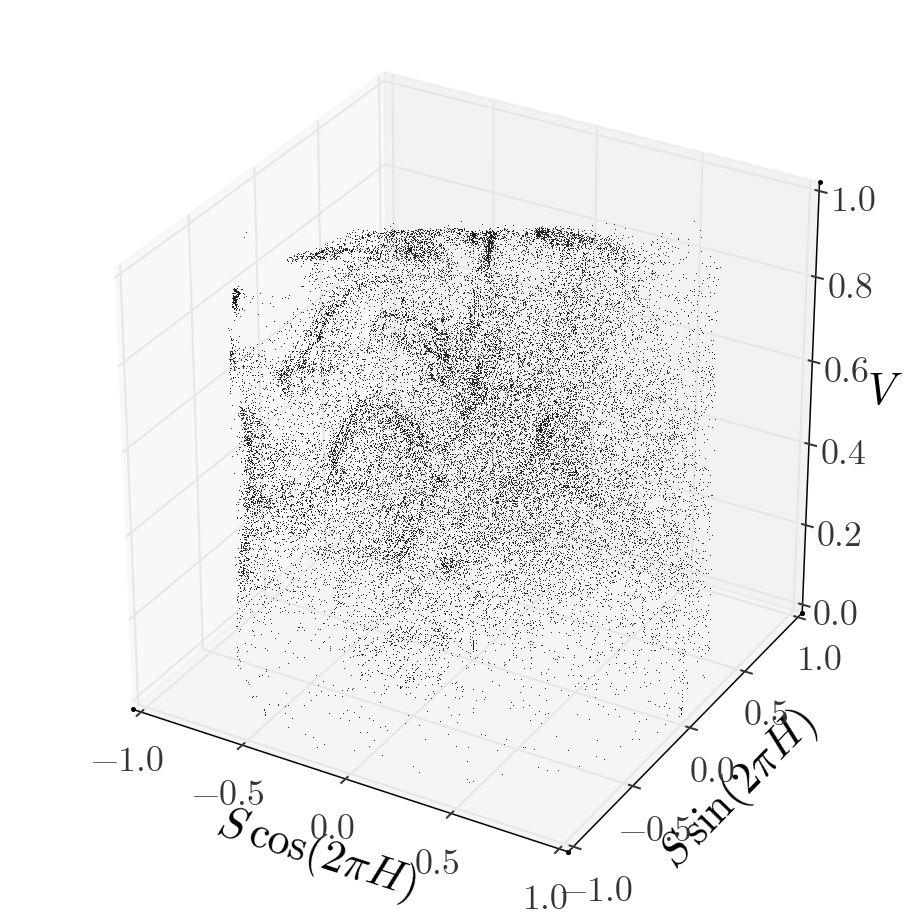

In [91]:
plt.figure(figsize=(8,8))

ax = plt.subplot(1,1,1,projection='3d')
plt.plot(x, y, z, linestyle='none', alpha=0.9, marker=',');

ax.set_xlabel(r'$S\,\cos (2\pi H)$')
ax.set_ylabel(r'$S\,\sin (2\pi H)$')
ax.set_zlabel(r'$V$')

In [112]:
X = np.vstack((x,y,z)).T
subset = shuffle(X)

In [134]:
clf = KMeans(n_clusters=8)
clf.fit(subset)
centroids = clf.cluster_centers_

# clf = GMM(n_components=16, )
# clf.fit(subset)
# centroids = clf.means_
# centroids = centroids[np.argsort(clf.weights_)]

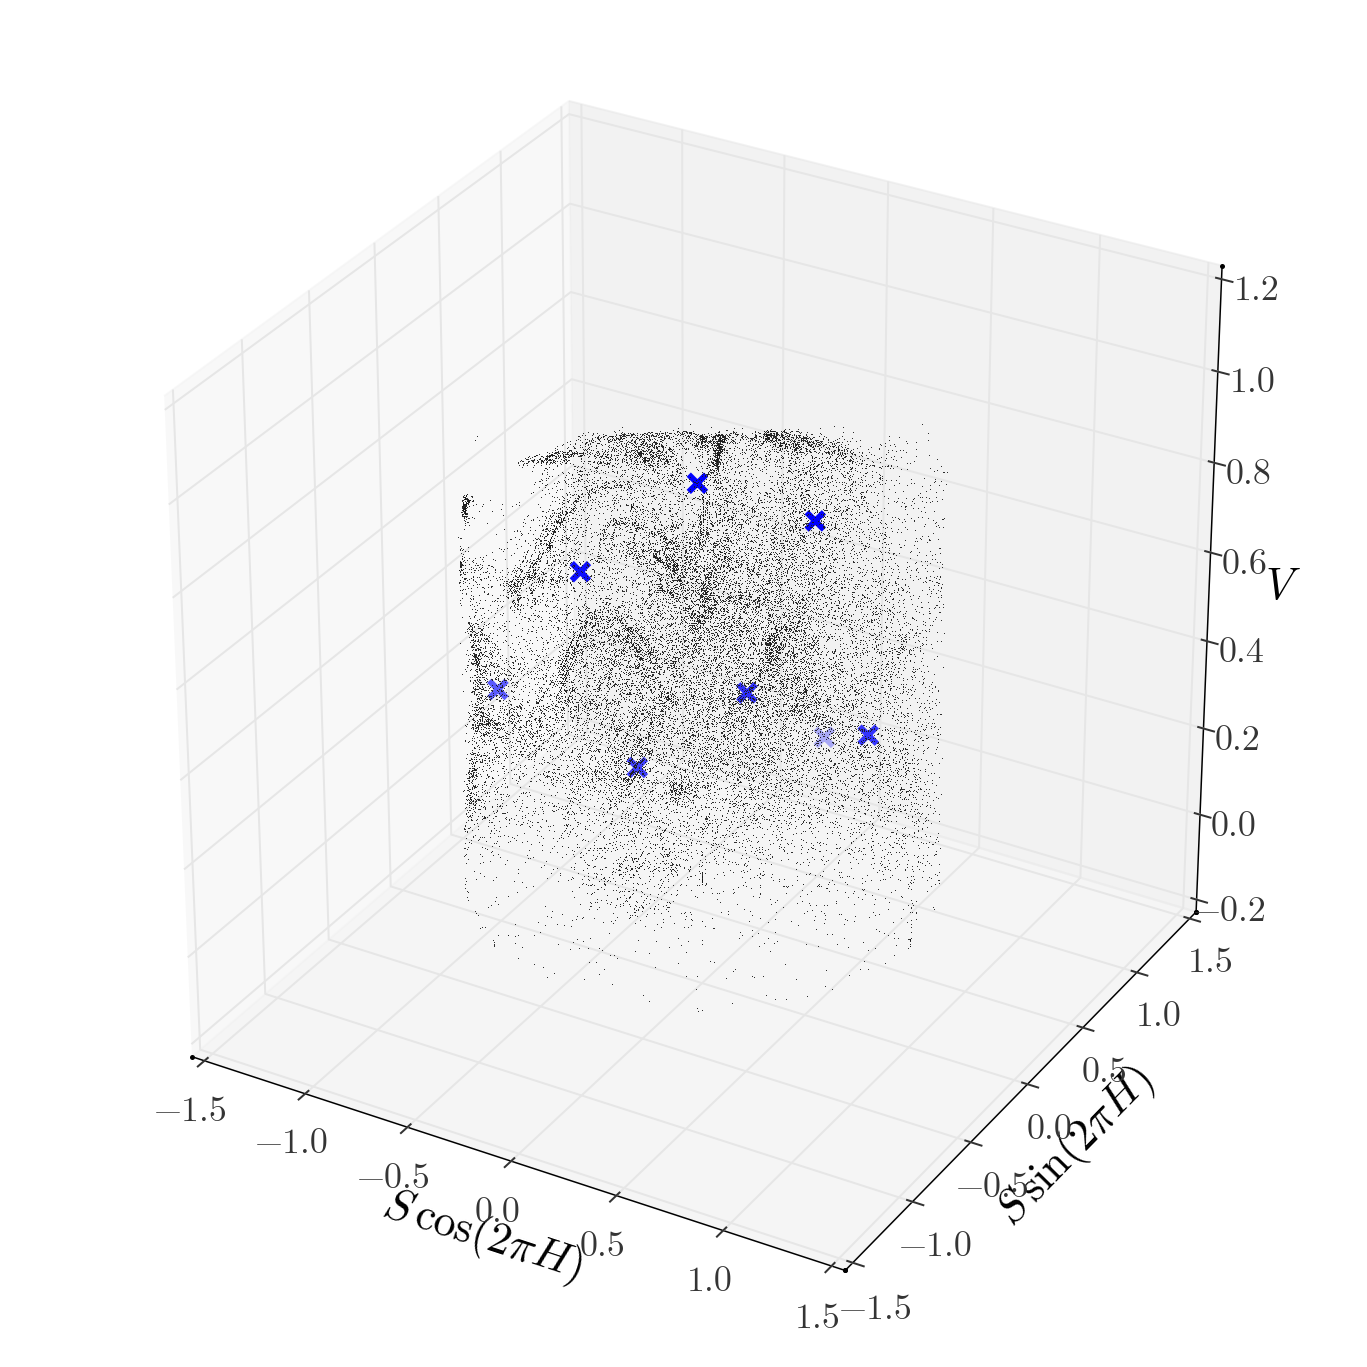

In [135]:
plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1,projection='3d')

ax.plot(subset[:,0], subset[:,1], subset[:,2], 
        linestyle='none', alpha=0.9, marker=',');

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           marker='x', s=75, linewidths=3,
           color='r', zorder=10)

ax.set_xlabel(r'$S\,\cos (2\pi H)$')
ax.set_ylabel(r'$S\,\sin (2\pi H)$')
ax.set_zlabel(r'$V$')

In [95]:
rgb_clusters = color.hsv2rgb(centroids[None])[0]
# rgb_clusters = centroids

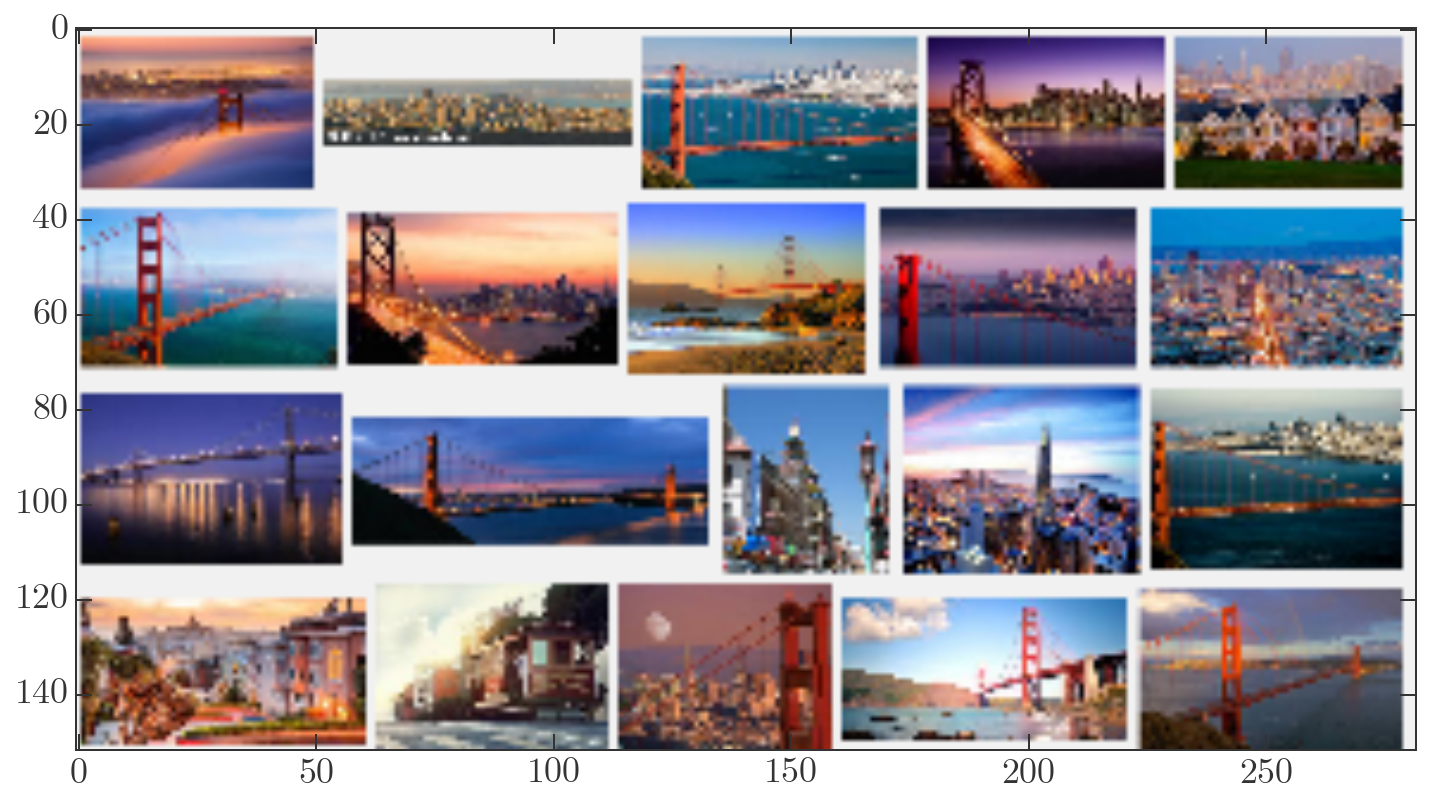

In [96]:
plt.figure(figsize=(12,10))
plt.imshow(rgb)

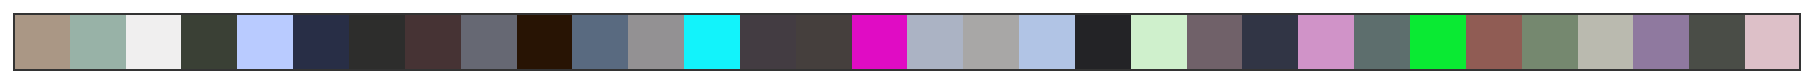

In [97]:
_n = int(np.sqrt(len(centroids)))

fig,ax = plt.subplots(1,1,figsize=(16,1))
ax.imshow(rgb_clusters.reshape(1,len(centroids),3), interpolation='nearest')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

---

In [121]:
bins = np.linspace(0,1,16)
H,edges = np.histogramdd(X, bins=(bins,bins,bins))

In [125]:
from scipy.ndimage import gaussian_filter

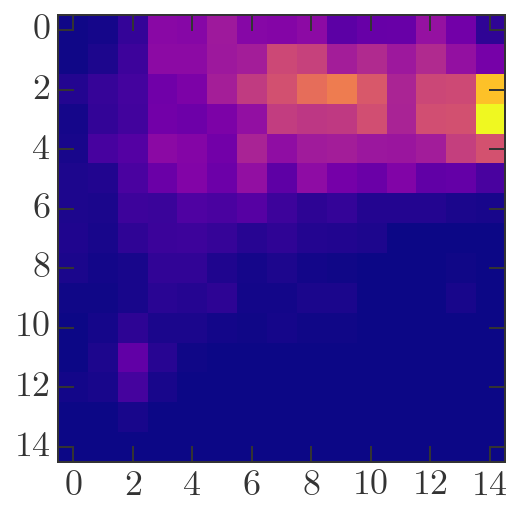

In [133]:
# plt.imshow(np.sum(H, axis=1))
plt.imshow(gaussian_filter(H, 0.5)[8], interpolation='nearest', cmap='plasma')